# House Price Prediction Using Advanced Regression Techniques
### By: Dhruv Jayant Verma

In this notebook, I'll predict house prices using various regression techniques on the Boston Housing dataset. I'll implement the following:

1) Data Preprocessing: Including standardization and outlier treatment.
2) Feature Engineering: Incorporate polynomial features.
3) Model Training: Train multiple regression models in one section.
4) Hyperparameter Tuning: Use GridSearchCV for hyperparameter optimization.
5) Model Evaluation: Evaluate all models in a separate section and visualize their performance.

## Libraries Required

In [1]:
# pip install pandas, numpy, matplotlib, seaborn, scikit-learn

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

# For modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# For evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Load & Explore the Dataset
I load the Boston Housing dataset and take a quick look at its structure.

In [3]:
# Load the dataset
boston_df = pd.read_csv('BostonHousing.csv')

# Display the first five rows
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Data Cleaning
Remove any missing values from the dataset to ensure data integrity.

In [4]:
# Check for missing values
print("Missing values in each column:")
print(boston_df.isnull().sum())

# Remove missing data
boston_df = boston_df.dropna()

Missing values in each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Correlation Analysis
I perform a correlation analysis to understand the relationships between variables.

In [5]:
# Calculate correlation coefficients
correlation_matrix = boston_df.corr().round(3)

## Heatmap of Correlation Coefficients
Visualize the correlation coefficients using a heatmap.

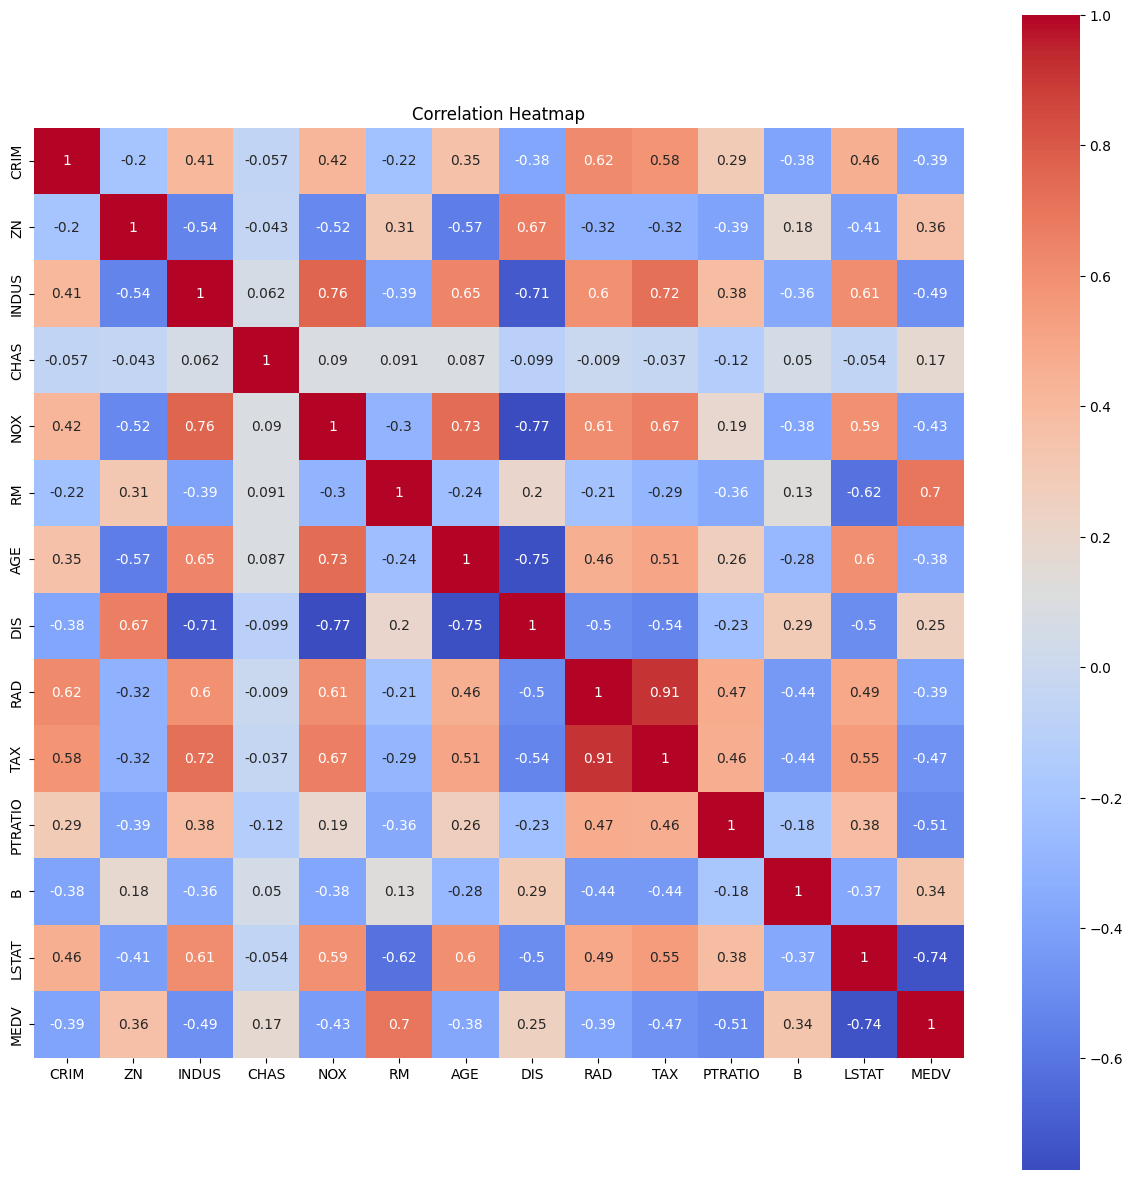

In [6]:
# Create a heatmap for the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Most Correlated Features with 'MEDV'
Identify the top features that are most correlated with the target variable 'MEDV'

In [7]:
# Find the top features most correlated with 'MEDV'
top_features = correlation_matrix['MEDV'].abs().sort_values(ascending=False).head(6).index.tolist()
print("Top features correlated with 'MEDV':\n", top_features)

Top features correlated with 'MEDV':
 ['MEDV', 'LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']


## Define Features and Target Variable
Based on the correlation analysis, I select the most relevant features.

In [8]:
# Define the features (independent variables)
X = boston_df[top_features[1:]]  # Exclude 'MEDV' as it's the target variable
print("\nFeature sample:")
print(X.head())

# Define the target variable (dependent variable)
y = boston_df['MEDV']
print("\nTarget variable sample:")
print(y.head())


Feature sample:
   LSTAT     RM  PTRATIO  INDUS  TAX
0   4.98  6.575     15.3   2.31  296
1   9.14  6.421     17.8   7.07  242
2   4.03  7.185     17.8   7.07  242
3   2.94  6.998     18.7   2.18  222
4   5.33  7.147     18.7   2.18  222

Target variable sample:
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


## Data Preprocessing

### Outlier Detection and Removal
Detect and remove outliers using the Z-score method.

In [9]:
# Calculate Z-scores
from scipy import stats

z_scores = np.abs(stats.zscore(X))
threshold = 3
outlier_indices = np.where(z_scores > threshold)

# Remove outliers
X_clean = X[(z_scores < threshold).all(axis=1)]
y_clean = y[(z_scores < threshold).all(axis=1)]

## Feature Standardization
Standardize the features to have zero mean and unit variance.

In [10]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X_clean)

## Polynomial Features
Introduce polynomial features to capture nonlinear relationships.

In [11]:
# Initialize polynomial features generator
poly = PolynomialFeatures(degree=2, include_bias=False)

# Transform the features
X_poly = poly.fit_transform(X_scaled)

## Split the Data into Training and Testing Sets
I split the dataset into training and testing sets to evaluate the model's performance on unseen data.

In [12]:
# Split scaled polynomial data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_clean, test_size=0.25, random_state=42)

# Model Training
In this section, I'll train multiple regression models using the prepared training data.

## Initialize Models
I'll use several Regression Algorithms:

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Decision Tree Regressor
5. Random Forest Regressor
6. Gradient Boosting Regressor
7. Support Vector Regressor

In [14]:
# Initialize models
models = {
    'Linear_Regression': LinearRegression(),
    'Ridge_Regression': Ridge(),
    'Lasso_Regression': Lasso(),
    'Decision_Tree': DecisionTreeRegressor(random_state=42),
    'Random_Forest': RandomForestRegressor(random_state=42),
    'Gradient_Boosting': GradientBoostingRegressor(random_state=42),
    'Support_Vector_Machine': SVR()
}

## Hyperparameter Tuning with GridSearchCV
Define hyperparameter grids for models that require tuning.

In [16]:
# Define parameter grids
param_grids = {
    'Ridge_Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso_Regression': {'alpha': [0.001, 0.01, 0.1]},
    'Decision_Tree': {'max_depth': [None, 5, 10, 20]},
    'Random_Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient_Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'Support_Vector_Machine': {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2]}
}

## Train Models with Cross-Validation and Hyperparameter Tuning

In [17]:
# Initialize a dictionary to store best estimators
best_estimators = {}

# Cross-validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=5)

# Train each model
for name, model in models.items():
    print(f"Training {name}...")
    if name in param_grids:
        # Perform Grid Search with Cross-Validation
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[name],
            cv=kfold,
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            verbose=0
        )
        grid_search.fit(X_train, y_train)
        best_estimators[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        # For models without hyperparameters to tune
        model.fit(X_train, y_train)
        best_estimators[name] = model

Training Linear_Regression...
Training Ridge_Regression...
Best parameters for Ridge_Regression: {'alpha': 10.0}
Training Lasso_Regression...
Best parameters for Lasso_Regression: {'alpha': 0.01}
Training Decision_Tree...
Best parameters for Decision_Tree: {'max_depth': 5}
Training Random_Forest...
Best parameters for Random_Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Training Gradient_Boosting...
Best parameters for Gradient_Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training Support_Vector_Machine...
Best parameters for Support_Vector_Machine: {'C': 10, 'epsilon': 0.2}


## Model Evaluation
In this section, we will evaluate all trained models on the test data and compare their performance.

## Initialize Evaluation Metrics

In [18]:
# Initialize lists to store evaluation metrics
model_names = []
r2_scores = []
mae_scores = []
mse_scores = []
rmse_scores = []

## Evaluate Each Model

In [20]:
# Evaluate each model
for name, model in best_estimators.items():
    print(f"\n****Evaluating {name}****")
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Store the metrics
    model_names.append(name)
    r2_scores.append(r2)
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    
    # Print the metrics
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")


****Evaluating Linear_Regression****
R-squared: 0.7984
Mean Absolute Error: 2.4825
Mean Squared Error: 14.8855
Root Mean Squared Error: 3.8582

****Evaluating Ridge_Regression****
R-squared: 0.8050
Mean Absolute Error: 2.4730
Mean Squared Error: 14.3938
Root Mean Squared Error: 3.7939

****Evaluating Lasso_Regression****
R-squared: 0.8017
Mean Absolute Error: 2.4725
Mean Squared Error: 14.6423
Root Mean Squared Error: 3.8265

****Evaluating Decision_Tree****
R-squared: 0.6942
Mean Absolute Error: 2.9533
Mean Squared Error: 22.5769
Root Mean Squared Error: 4.7515

****Evaluating Random_Forest****
R-squared: 0.8191
Mean Absolute Error: 2.2914
Mean Squared Error: 13.3564
Root Mean Squared Error: 3.6546

****Evaluating Gradient_Boosting****
R-squared: 0.8336
Mean Absolute Error: 2.2657
Mean Squared Error: 12.2863
Root Mean Squared Error: 3.5052

****Evaluating Support_Vector_Machine****
R-squared: 0.8198
Mean Absolute Error: 2.3431
Mean Squared Error: 13.2995
Root Mean Squared Error: 3.64

## Compare Model Performances

In [21]:
# Create a DataFrame to compare model performances
performance_df = pd.DataFrame({
    'Model': model_names,
    'R-squared': r2_scores,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'RMSE': rmse_scores
})

# Sort by R-squared in descending order
performance_df = performance_df.sort_values(by='R-squared', ascending=False)
print("\nModel Performance Comparison:")
performance_df.reset_index(drop=True, inplace=True)
performance_df


Model Performance Comparison:


,Model,R-squared,MAE,MSE,RMSE
0,Gradient_Boosting,0.833573,2.265725,12.286282,3.505179
1,Gradient_Boosting,0.833573,2.265725,12.286282,3.505179
2,Support_Vector_Machine,0.819849,2.343144,13.299457,3.646842
3,Support_Vector_Machine,0.819849,2.343144,13.299457,3.646842
4,Random_Forest,0.819078,2.291357,13.356385,3.654639
5,Random_Forest,0.819078,2.291357,13.356385,3.654639
6,Ridge_Regression,0.805025,2.472953,14.393831,3.793920
7,Ridge_Regression,0.805025,2.472953,14.393831,3.793920
8,Lasso_Regression,0.801660,2.472484,14.642253,3.826520
9,Lasso_Regression,0.801660,2.472484,14.642253,3.826520


## Visualize Model Performances

#### Bar Plot of R-squared Scores

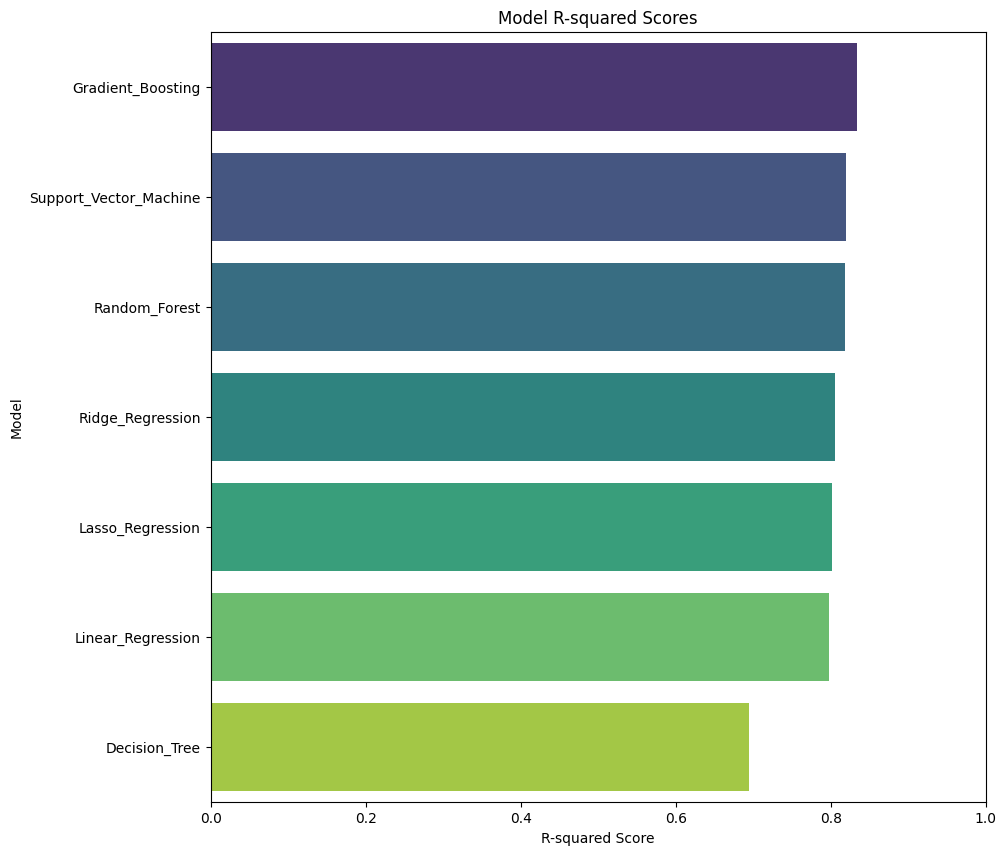

In [22]:
# Bar plot of R-squared scores
plt.figure(figsize=(10, 10))
sns.barplot(x='R-squared', y='Model', data=performance_df, palette='viridis')
plt.title('Model R-squared Scores')
plt.xlabel('R-squared Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

## Plot Predicted vs Actual Prices for Best Model
Identify the best model based on R-squared score and plot its predictions.

Best Model: Gradient_Boosting


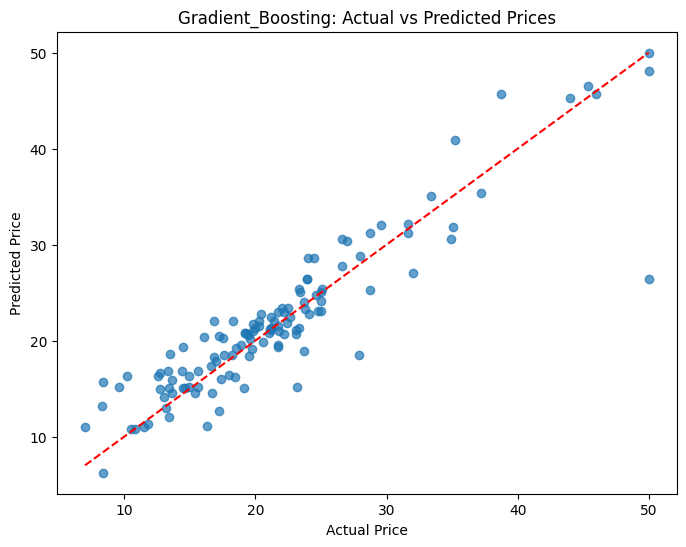

In [23]:
# Get the best model
best_model_name = performance_df.iloc[0]['Model']
best_model = best_estimators[best_model_name]
print(f"Best Model: {best_model_name}")

# Make predictions with the best model
y_pred_best = best_model.predict(X_test)

# Plot predicted vs actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'{best_model_name}: Actual vs Predicted Prices')
plt.show()